In [6]:
from gensim.models import FastText
import os,sys
from urllib.parse import urlparse
from getImagesFunctions import *
from getDataFunctions import *
from gensim.models import Word2Vec
import gensim
import random
import langid
from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
import re

In [18]:
urls = []
for i in range(1,6):
    d = pd.read_csv("C:/Users/Ruben/Documents/GitHub/ReACT_GCV/code/work/scrape_environment/npg_source/dates_iteration{}.csv".format(i))
    urls = urls + list(zip(list(d['url']), list(d['date'])))
urls = [u for u in urls if str(u[1]) != "nan"]

In [38]:
delimiters = "/", ".", " "
regexPattern = '|'.join(map(re.escape, delimiters))

def ProcessURL(url):
    url_slice = [x for x in urlparse(url) if i][2:]
    url_slice = " ".join([x for x in url_slice if x])
    url_phrase = re.split(regexPattern, url_slice)
    url_phrase = [x for x in url_phrase if x]
    
    if len(url_phrase) == 0:
        return "na"

    url_phrase = max(url_phrase, key=len)
    if "-" in url_phrase:
        url_phrase = url_phrase.split('-')
    else:
        return "na"
    
    lang = identifier.classify(" ".join(url_phrase))
    return [" ".join(url_phrase), lang[0],lang[1]]


In [42]:
url_d = dict()

for u in urls:
    date = u[1]
    res = ProcessURL(u[0])
    if res == "na":
        continue
    else:
        phrase = res[0]
        lang_guess = res[1]
        lang_prob = res[2]
        url_d.update({u[0]:[date, phrase, lang_guess, lang_prob]})

In [59]:
## remove low prob ones

url_dn = {k:v for k,v in url_d.items() if v[3] > 0.6}

In [53]:
for lang in list(set([v[2] for k,v in url_d.items()])):
    sumlang = sum([float(v[3]) for k,v in url_d.items() if v[2] == lang])
    lenlang = len([v[3] for k,v in url_d.items() if v[2] == lang])
    prob = round(lenlang / sumlang) * 100
    print(lang, prob)

bs 100
nl 100
vo 200
lb 100
pl 100
se 200
fr 100
lt 100
pt 100
it 100
mg 100
sw 100
eu 100
nn 200
la 200
id 100
tl 100
hr 100
ms 200
vi 100
ca 100
sk 100
tr 100
sv 100
sl 100
af 100
an 100
da 100
is 100
br 100
rw 100
mt 200
ga 100
gl 100
de 100
en 100
sq 100
nb 200
oc 100
jv 100
zu 200
es 100
hu 100
et 200
fo 200
lv 100
ro 100
no 100
cy 100
eo 100
cs 200
fi 200


In [67]:
reslist = []

for year in list(set([v[0][0:4] for k,v in url_dn.items() if v[0][0:4] != "unsu"])):
    subset_year = {k:v for k,v in url_dn.items() if v[0][0:4] == year}
    
    for lang in list(set([v[2] for k,v in url_d.items()])):
        num_year_lang = len([v for k,v in subset_year.items() if v[2] == lang])
        reslist.append([year, lang, num_year_lang])
        

In [68]:
resdf = pd.DataFrame(reslist, columns = ['year','lang','count']).pivot(index='year',values='count',columns = 'lang').reset_index()

In [80]:
selcol = [c for c in list(resdf.columns[1:]) if resdf[c].sum() > 25] + ['year']
resdf = resdf[selcol]

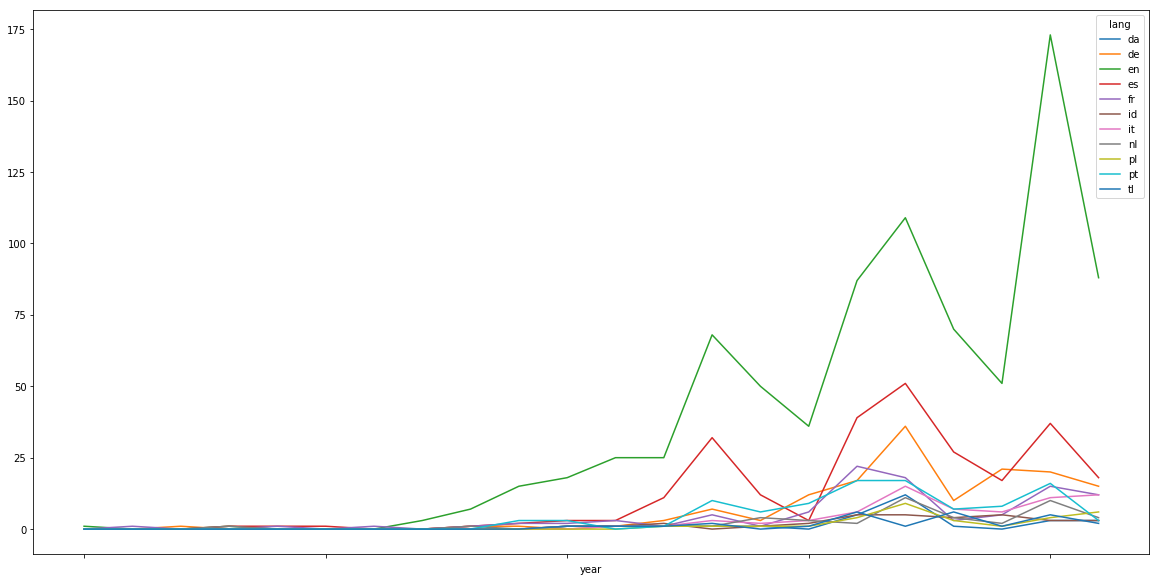

In [84]:
p = resdf.plot(x='year',y=list(resdf.columns)[:-1],figsize = (20,10))

In [82]:
resdf

lang,da,de,en,es,fr,id,it,nl,pl,pt,tl,year
0,0,0,1,0,0,0,0,0,0,0,0,1995
1,0,0,0,0,1,0,0,0,0,0,0,1998
2,0,1,0,0,0,0,0,0,0,0,0,1999
3,0,0,1,1,0,0,0,1,0,0,0,2000
4,0,0,0,1,1,0,0,0,0,0,0,2001
5,0,0,0,1,0,0,0,0,0,0,0,2004
6,0,0,0,0,1,0,0,0,0,0,0,2005
7,0,0,3,0,0,0,0,0,0,0,0,2006
8,0,1,7,1,1,0,0,1,0,0,0,2007
9,0,1,15,2,2,0,0,0,0,3,0,2008
